# Objective

Analyze average total body NNDs with amphora Y114 as reference. 

New visualization types (added since last time):
- Scatter plots to see strength of linear correlations:
    - Delta Max Diameter vs. Avg NND
    - Delta Capacity vs. Avg NND
    - Delta Capacity vs. Delta Max Diameter

Other updates since last time:
- For the plots that show delta physical measurements, I changed the units for max diameter from cm to mm and for volume from liters to deciliters.
- I left the units as before for the plots where physical measurements aren't shown in terms of delta, since NND is way smaller so the plots would not be helpful.

# Results

- Delta Max Diameter vs. Avg NND: linear fit shows a strong correlation (r^2 = 0.78)
- Delta Capacity vs. Avg NND: linear fit shows a moderate correlation (r^2 = 0.64)
- Delta Capacity vs. Delta Max Diameter: linear fit shows a strong correlation (r^2 = 0.71)

# Notes on Max Diameter and Capacity Data

All capacity data is physically measured data. Most max diameter data is physically measured data. 

Since physically measured max diameters were unavailable for the wide band jars, these measurements were taken using CloudCompare. When I checked the jars that have physically measured diameters available, to see whether these physically measured diameters match with the diameter measurements from CloudCompare, I found that max diameters found in CloudCompare are for some reason consistently 1 mm less than physically measured diameters. Therefore, to get the max diameters shown here for the wide band jars, I added 1 mm to the max diameters I found in CloudCompare.

In [1]:
import sys
sys.path.insert(0,'../../../')
import util
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

# Inputs

In [1]:
compare = ['83-2',
            '84-1',
            '84-3',
            '84-10',
            '86-38',
            '86-45',
            '86-75',
            '86-85',
            '86-92',
            '86-93',
            '86-95',
            '86-96',
            '86-99',
            '86-100',
            '86-113',
            'C',
            'D',
            'F',
            'UN16',
            'W1',
            'W8',
            'W43',
            'W55',
            'W63',
            'W69',
            'W70',
            'X5',
            'X12',
            'Y2',
            'Y7',
            'Y11',
            'Y12',
            'Y14',
            'Y15',
            'Y22',
            'Y28',
            'Y32',
            'Y34',
            'Y39',
            'Y45',
            'Y52',
            'Y123',
            'Y126',
            'Y127',
            'Y128']
ref = 'Y114'
path_to_models = './bodies_registered/'
path_to_ref = './body_reference/'
save_distances = True
ref_csv_path = './body_reference_cleaned/YA7_' + ref + '_body.csv'

# Comparison

Calculated average NNDs if not previously calculated.

In [4]:
average_distances = []
stdev_distances = []
for model in compare:
    
    print(model) # so the user can see which segment the code is working on
    
    model_csv_path = './bodies_registered_cleaned/YA7_' + model + '_body.csv'
    dist_path = './bodies_distances/' + ref + '_' + model + '_distances.csv'
    
    average_distance, stdev_distance = util.get_avg_cc_dist(ref_csv_path, model_csv_path, save_distances, dist_path)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

Load average NNDs if previously calculated.

In [19]:
avg_std_distances = pd.read_csv('avg_std_distances_y114.csv', delimiter=',')

In [3]:
average_distances = list(avg_std_distances.avg_dist)

Load physically measured data.

In [53]:
group_data = pd.read_csv('bodies_group_data_y114.csv')

In [54]:
diameter_y114 = 41.9
capacity_y114 = 35.97

In [55]:
average_distances_signed = []
for distance, diameter in zip(average_distances, list(group_data.diameter)):
    if diameter < diameter_y114:
        average_distances_signed.append(distance*-1)
    else:
        average_distances_signed.append(distance)

# Morphological difference with Y114 across the dataset

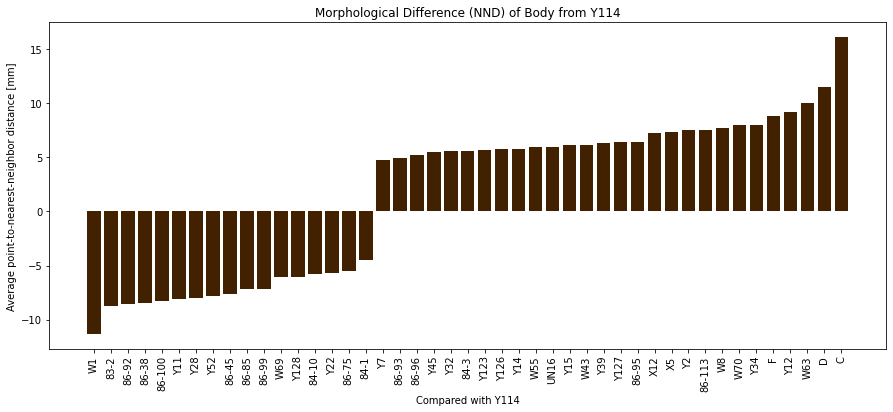

In [57]:
# order the compared amphoras by avg NND to ref amphora
compare_sorted = [x for _,x in sorted(zip(average_distances_signed, compare))]
average_distances_sorted = sorted(average_distances_signed)

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color='#412100')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_title('Morphological Difference (NND) of Body from %s' % ref)
plt.xticks(rotation='vertical')
plt.show()

# Coloring by group

#### Assign a color to each group.

In [58]:
color_dict = {'Spiral combed - main group': '#412100',
              'Spiral combed - main group - ring lip': 'xkcd:violet',
              'Spiral combed - fractional': 'xkcd:tan',
              'Spiral combed - massive neck, massive diagonal handles': 'xkcd:red',
              'Spiral combed - massive neck, massive vertical handles': 'xkcd:orange',
              'Spiral combed - outlier?': 'xkcd:green',
              'Wide band of combing/squared handles': 'xkcd:blue' 
             }

In [59]:
labels = list(group_data.group)
colors = [color_dict[label] for label in labels]

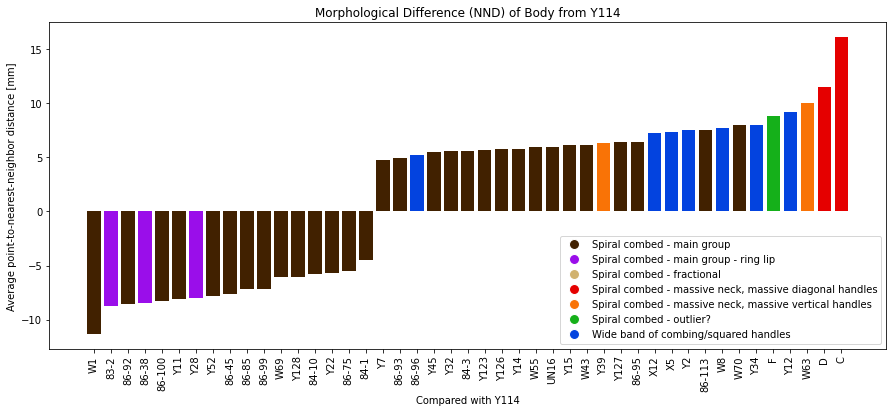

In [60]:
colors_sorted = [x for _,x in sorted(zip(average_distances_signed, colors))]

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color=colors_sorted)
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_title('Morphological Difference (NND) of Body from %s' % ref)
plt.xticks(rotation='vertical')

handle_list = []
for label in color_dict:
    handle_list.append(Line2D([0],[0], marker='o', color='w', markersize=10,
                              markerfacecolor=color_dict[label], label=label))

plt.legend(handles=handle_list, loc='lower right')

plt.show()

## Get absolute and delta max diameters

In [61]:
diameters = list(group_data.diameter)
diameters_signed = []
for diameter in diameters:
    if diameter < diameter_y114:
        diameters_signed.append(diameter*-1)
    else:
        diameters_signed.append(diameter)
diameters_sorted = [x for _,x in sorted(zip(average_distances_signed, diameters_signed))]
diameters_sorted_deltas = [abs(x) - diameter_y114 for x in diameters_sorted]

## Get absolute and delta capacities

In [62]:
capacities = list(group_data.capacity)
capacities_signed = []
for capacity in capacities:
    if capacity < capacity_y114:
        capacities_signed.append(capacity*-1)
    else:
        capacities_signed.append(capacity)
capacities_sorted = [x for _,x in sorted(zip(average_distances_signed, capacities_signed))]

capacities_sorted_deltas = []
for x in capacities_sorted:
    if x==0:
        capacities_sorted_deltas.append(0)
    else:
        capacities_sorted_deltas.append(abs(x) - capacity_y114)

# Plot with max diameter (and without capacity)

Excluding capacity since capacity is not available for all jars. Scroll further for plot that includes max diameter and capacity.

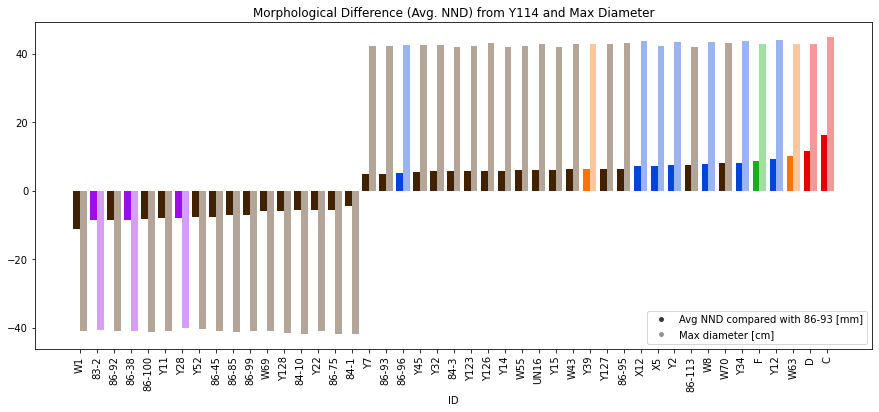

In [68]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.4
s = 0.2

diameters_sorted_mm = [x*10 for x in diameters_sorted]

ax.bar(x_pos-s, average_distances_sorted,width=w,color=colors_sorted,align='center')
ax.bar(x_pos+s, diameters_sorted,width=w,color=colors_sorted,alpha=0.4,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:dark grey', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:grey', label='Max diameter [cm]')]
plt.legend(handles=handle_list, loc='lower right')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from Y114 and Max Diameter')
plt.xticks(rotation='vertical')
plt.show()

# Plot with delta max diameter (and without delta capacity)

Excluding delta capacity since capacity is not available for all jars. Scroll further for plot that includes delta max diameter and delta capacity.

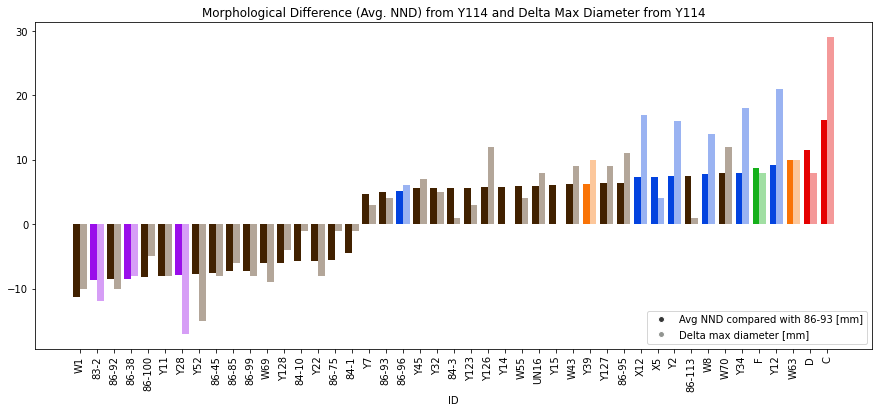

In [65]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.4
s = 0.2

diameters_sorted_deltas_mm = [x*10 for x in diameters_sorted_deltas]

ax.bar(x_pos-s, average_distances_sorted,width=w,color=colors_sorted,align='center')
ax.bar(x_pos+s, diameters_sorted_deltas_mm, width=w,color=colors_sorted,alpha=0.4,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:dark grey', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:grey', label='Delta max diameter [mm]')]
plt.legend(handles=handle_list, loc='lower right')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from Y114 and Delta Max Diameter from Y114')
plt.xticks(rotation='vertical')
plt.show()

# Plot with max diam and capacity

(Capacity data presented wherever available)

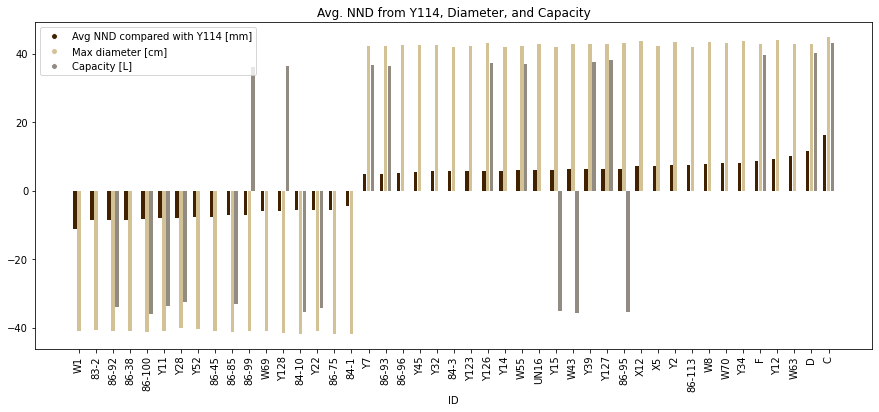

In [69]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w,color='#412100',align='center')
ax.bar(x_pos, diameters_sorted, width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, capacities_sorted, width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Capacity [L]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Avg. NND from Y114, Diameter, and Capacity')
plt.xticks(rotation='vertical')
plt.show()

Observations of the above: 
- There are two jars where shape and diameter are slightly smaller than ref shape and ref diameter, but capacity is slightly larger than ref capacity.
- There are three jars where shape and diameter are slightly larger than ref shape and ref diameter, but capacity is slightly smaller than ref capacity.
- This is not surprising, and other than that, all is as expected.

# Plot with delta max diam and delta capacity

(Capacity data presented where available)

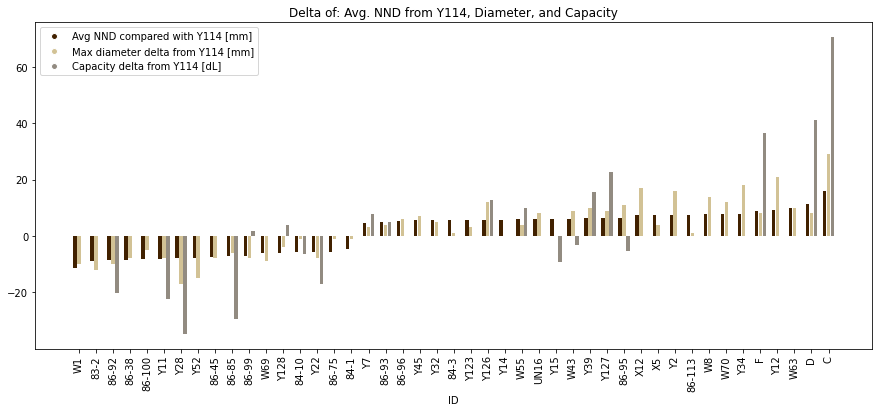

In [72]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

diameters_sorted_deltas_mm = [x*10 for x in diameters_sorted_deltas]
capacities_sorted_deltas_dL = [x*10 for x in capacities_sorted_deltas]

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w,color='#412100',align='center')
ax.bar(x_pos, diameters_sorted_deltas_mm, width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, capacities_sorted_deltas_dL, width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter delta from Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Capacity delta from Y114 [dL]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Delta of: Avg. NND from Y114, Diameter, and Capacity')
plt.xticks(rotation='vertical')
plt.show()

In [120]:
def get_r_squared(x_values, y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    return r_squared

# Delta Max Diameter vs. Avg NND

- Linear fit shows a strong correlation (r^2 = 0.78)
- The two clusters correspoind to jars that are smaller and larger than the reference jar

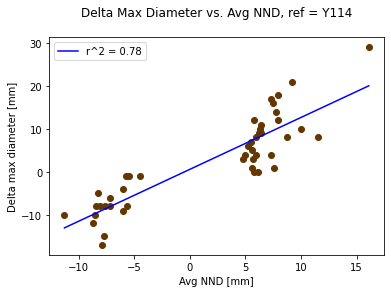

In [119]:
_, _, r_value, _, _ = scipy.stats.linregress(average_distances_sorted, diameters_sorted_deltas_mm)
r_squared = round(r_value**2, 2)

handle_list = [Line2D([0],[0], color='b', markerfacecolor='None', label='r^2 = %s' % r_squared)]
plt.legend(handles=handle_list)

coef = np.polyfit(average_distances_sorted,diameters_sorted_deltas_mm,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(average_distances_sorted, poly1d_fn(average_distances_sorted), '-b')

plt.title('Delta Max Diameter vs. Avg NND, ref = Y114\n')
plt.xlabel('Avg NND [mm]')
plt.ylabel('Delta max diameter [mm]')
plt.scatter(average_distances_sorted, diameters_sorted_deltas_mm, color='xkcd:brown')
plt.show()

# Delta Capacity vs. Avg NND
- Linear fit shows a moderate correlation (r^2 = 0.64)
- The two clusters correspoind to jars that are smaller and larger than the reference jar
    - No jar has an average NND closer than 5mm to the reference jar

In [113]:
# Remove points that are missing volume data
capacities_sorted_deltas_no_zeros = []
average_distances_sorted_no_zeros = []
diameters_sorted_deltas_mm_no_zeros = []
for a, c, d in zip(average_distances_sorted, capacities_sorted_deltas, diameters_sorted_deltas_mm):
    if c != 0:
        capacities_sorted_deltas_no_zeros.append(c)
        average_distances_sorted_no_zeros.append(a)
        diameters_sorted_deltas_mm_no_zeros.append(d)

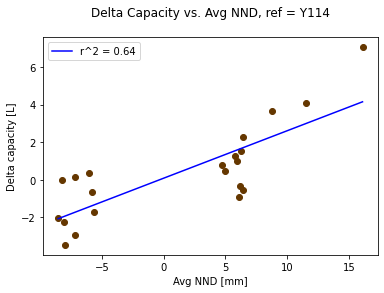

In [118]:
_, _, r_value, _, _ = scipy.stats.linregress(average_distances_sorted_no_zeros, capacities_sorted_deltas_no_zeros)
r_squared = round(r_value**2, 2)

handle_list = [Line2D([0],[0], color='b', markerfacecolor='None', label='r^2 = %s' % r_squared)]
plt.legend(handles=handle_list)

coef = np.polyfit(average_distances_sorted_no_zeros,capacities_sorted_deltas_no_zeros,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(average_distances_sorted_no_zeros, poly1d_fn(average_distances_sorted_no_zeros), '-b')

plt.title('Delta Capacity vs. Avg NND, ref = Y114\n')
plt.xlabel('Avg NND [mm]')
plt.ylabel('Delta capacity [L]')
plt.scatter(average_distances_sorted_no_zeros, capacities_sorted_deltas_no_zeros, color='xkcd:brown')
plt.show()

# Delta Capacity vs. Delta Max Diameter
- Linear fit shows a strong correlation (r^2 = 0.71)

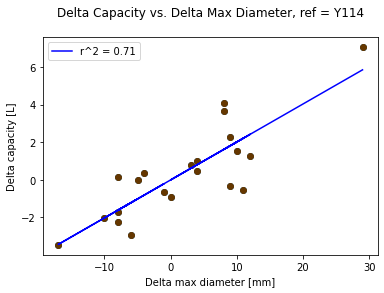

In [117]:
plt.scatter(diameters_sorted_deltas_mm_no_zeros, capacities_sorted_deltas_no_zeros)

_, _, r_value, _, _ = scipy.stats.linregress(diameters_sorted_deltas_mm_no_zeros, capacities_sorted_deltas_no_zeros)
r_squared = round(r_value**2, 2)

handle_list = [Line2D([0],[0], color='b', markerfacecolor='None', label='r^2 = %s' % r_squared)]
plt.legend(handles=handle_list)

coef = np.polyfit(diameters_sorted_deltas_mm_no_zeros, capacities_sorted_deltas_no_zeros,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(diameters_sorted_deltas_mm_no_zeros, poly1d_fn(diameters_sorted_deltas_mm_no_zeros), '-b')

plt.title('Delta Capacity vs. Delta Max Diameter, ref = Y114\n')
plt.xlabel('Delta max diameter [mm]')
plt.ylabel('Delta capacity [L]')
plt.scatter(diameters_sorted_deltas_mm_no_zeros, capacities_sorted_deltas_no_zeros, color='xkcd:brown')
plt.show()

# Average NND Values
(Quick reference table)

In [43]:
print('\nmodel\taverage distance from %s [mm]\n' % ref)
for model, average_distance in zip(compare, average_distances):
    print(model, '\t', average_distance)


model	average distance from Y114 [mm]

83-2 	 8.73
84-1 	 4.46
84-3 	 5.6
84-10 	 5.76
86-38 	 8.49
86-45 	 7.62
86-75 	 5.53
86-85 	 7.2
86-92 	 8.53
86-93 	 4.94
86-95 	 6.44
86-96 	 5.19
86-99 	 7.2
86-100 	 8.24
86-113 	 7.53
C 	 16.1
D 	 11.5
F 	 8.78
UN16 	 5.96
W1 	 11.3
W8 	 7.72
W43 	 6.18
W55 	 5.93
W63 	 10.0
W69 	 6.06
W70 	 7.96
X5 	 7.31
X12 	 7.26
Y2 	 7.5
Y7 	 4.75
Y11 	 8.09
Y12 	 9.22
Y14 	 5.8
Y15 	 6.1
Y22 	 5.65
Y28 	 7.96
Y32 	 5.59
Y34 	 7.96
Y39 	 6.28
Y45 	 5.53
Y52 	 7.78
Y123 	 5.68
Y126 	 5.76
Y127 	 6.4
Y128 	 6.05
